# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

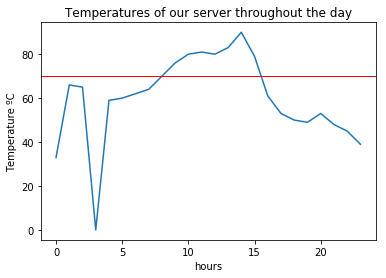

In [68]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [69]:
# assign a variable to the list of temperatures
temperature_list = y
# 1. Calculate the minimum of the list and print the value using print()
minimum = min(temperature_list)
minimum_hour = temperature_list.index(minimum)

print ('The minimum temperature was', minimum, 'at', minimum_hour, 'hours')

# 2. Calculate the maximum of the list and print the value using print()
maximum = max(temperature_list)
maximum_hour = temperature_list.index(maximum)

print ('The maximum temperature was', maximum, 'at', maximum_hour, 'hours')

# 3. Items in the list that are greater than 70ºC and print the result
over_70 = []
for temp in temperature_list:
  if temp > 70:
    over_70.append (temp)
    
print (over_70)

# 4. Calculate the mean temperature throughout the day and print the result
mean_temperature = sum(temperature_list)/len(temperature_list)

print ('The mean temperature throughout the day was', mean_temperature)

# 5.1 Solve the fault in the sensor by estimating a value

real_3AM = (temperature_list[2] + temperature_list[4]) / 2 # The real temperature at 3AM should be a intermediate value between 2AM and 4AM temperatures

# 5.2 Update of the estimated value at 03:00 on the list

temperature_list[3] = real_3AM
print(temperature_list)
mean_temperature = sum(temperature_list)/len(temperature_list)
# Bonus: convert the list of ºC to ºFarenheit
temperature_farenheit = []
farenheit = 0
for hour in range (0, len(temperature_list)):
  farenheit = 1.8 * temperature_list[hour] + 32
  temperature_farenheit.append(farenheit)
  
print(temperature_farenheit)


The minimum temperature was 0 at 3 hours
The maximum temperature was 90 at 14 hours
[76, 80, 81, 80, 83, 90, 79]
The mean temperature throughout the day was 60.25
[33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]
[91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [70]:
# Print True or False depending on whether you would change the cooling system or not
change = False
if max(temperature_list) > 80: #Check higher temperature
  change = True
if mean_temperature > 65: #Check mean temperature
  change = True
count = 0
for temp in temperature_list:
  if temp > 70:
    count += 1
if count > 4: #Check hours with more that 70º
  change = True
if change == True:
  print ('The cooling system has to be changed')
else:
  print ('The colling system is working fine and not need to be replaced')

The cooling system has to be changed


## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [71]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
Bad_hours = []
for hour in range (0, len(temperature_list)):
  if temperature_list[hour] > 70:
    Bad_hours.append (hour)
    
print (Bad_hours)


[9, 10, 11, 12, 13, 14, 15]


In [72]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
consecutive_hours = False
count = 0
for temp in temperature_list:
  if temp > 70:
    count += 1
  else:
    count = 0
if count > 4:
  consecutive_hours = True
  
if consecutive_hours == True:
  print ('Condition met')
else:
  print ('Condition not met')

Condition not met


In [73]:
# 3. Average of each of the lists (ºC and ºF). How they relate?
mean_farenheit = sum(temperature_farenheit)/len(temperature_farenheit)
print ('Mean in Celsius:', mean_temperature)
print ('Mean in Farenheit:', mean_farenheit)

#We convert the mean in celsius to Farenheit:
mean_farenheit2 = 1.8 * mean_temperature + 32

print ('The mean in Celius converted into Farenheit is the same that the mean of Farenheit temperatures:', mean_farenheit2)


Mean in Celsius: 62.833333333333336
Mean in Farenheit: 145.1
The mean in Celius converted into Farenheit is the same that the mean of Farenheit temperatures: 145.10000000000002


In [75]:
# 4. Standard deviation of each of the lists. How they relate?
celsius_stdev = 0
farenheit_stdev = 0
x = 0
for temp in temperature_list:
  x += (temp - mean_temperature)**2
celsius_stdev = (x/(len(temperature_list)-1))**0.5 #We calculate Celsius standard deviation

x = 0
for temp in temperature_farenheit:
  x += (temp - mean_farenheit)**2
farenheit_stdev = (x/(len(temperature_farenheit)-1))**0.5 #We calculate Farenheit standard deviation

print ('Celsius temperature standard deviation =', celsius_stdev)
print ('Farenheit temperature standard deviation =', farenheit_stdev)

#To convert the standard deviation, we onlye need to multiply for the linear factor without adding 32
farenheit_stdev2 = 1.8 * celsius_stdev 

print ('The standard deviation in Celius multiplied for the current factor (1.8) is the same that the standard deviation of Farenheit temperatures:', farenheit_stdev2)


Celsius temperature standard deviation = 14.94821980579356
Farenheit temperature standard deviation = 26.906795650428407
The standard deviation in Celius multiplied for the current factor (1.8) is the same that the standard deviation of Farenheit temperatures: 26.906795650428407
